In [1]:
# import fiona
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

from shapely.geometry import Point, MultiPoint

# Agricultural Land Classification

Agricultural Land Classification data for England can be downloaded here https://data.gov.uk/dataset/952421ec-da63-4569-817d-4d6399df40a1/provisional-agricultural-land-classification-alc.
Data includes England only.


Agricultural land is classified into five grades, with grade one being best quality and grade five is poorest quality. 
In this notebook we plot the land classification within the historic county of Yorkshire. To obtain the Yorkshire county boundaries we use Boundary-Lane data from the Ordnance Survey Data Hub https://osdatahub.os.uk/downloads/open/BoundaryLine, which can be accessed for free by selecting the GeoPackage data format, and extracting the `bdline_gb.gpkg` file.

We then store a low resolution pixelised version of the map using `xarray`, with the resolution in meters being set in  the next cell by the `resolution` parameter.

In [2]:
border_file = '../../data/land/bdline_gb.gpkg' 
alc_file = '../../data/land/NE_AgriculturalLandClassificationProvisionalEngland_FGDB/data.gdb/'
# Resolution in meters
resolution = 250

In [3]:
yorkshire_index = 66
counties = gpd.read_file(border_file, layer='boundary_line_historic_counties')
polygon = counties['geometry'].iloc[yorkshire_index]
counties

,Name,Area_Description,geometry
0,Berkshire,Historic County,"MULTIPOLYGON (((422004.502 199086.601, 422030...."
1,Buckinghamshire,Historic County,"MULTIPOLYGON (((460619.899 235588.003, 460625...."
2,Hertfordshire,Historic County,"MULTIPOLYGON (((499772.602 215220.503, 499795...."
3,Herefordshire,Historic County,"MULTIPOLYGON (((335069.501 272770.499, 335082...."
4,Oxfordshire,Historic County,"MULTIPOLYGON (((424473.304 224921.896, 424502...."
...,...,...,...
90,Warwickshire,Historic County,"MULTIPOLYGON (((456472.501 274014.303, 456299...."
91,Dorset,Historic County,"MULTIPOLYGON (((333203.198 91375.703, 333185.9..."
92,Devon,Historic County,"MULTIPOLYGON (((333223.945 91353.145, 333218.0..."
93,Banffshire,Historic County,"MULTIPOLYGON (((349516.703 868874.397, 349519...."


In [4]:
cities = False

city_dict = {'Leeds' : [53.799722, -1.549167],
            'Sheffield' : [53.38297, -1.4659],
            'Bradford' : [53.8, -1.75],
            'Kingston upon Hull' : [53.744444, -0.3325],
            'York' : [53.958333, -1.080278],
            'Huddersfield' : [53.644811, -1.782137],
            'Middlesbrough' : [54.576397, -1.235758],}

In [5]:
alc = gpd.read_file(alc_file, mask = polygon)
alc

,geogext,ne_ne_admin_ne_agricultural_land_classification_provisional_engl,alc_grade,perimeter,shape_leng,shape_Length,shape_Area,geometry
0,M59J,942.1277,Grade 3,18581.668,18581.667808,18581.667808,9.421277e+06,"MULTIPOLYGON (((361710.000 486674.273, 362213...."
1,M59J,2779.4511,Grade 4,75890.818,75890.817695,75890.817694,2.779451e+07,"MULTIPOLYGON (((366852.483 492413.885, 366687...."
2,M59J,6920.5087,Grade 5,77055.780,77055.780055,77055.780055,6.920509e+07,"MULTIPOLYGON (((363656.712 488841.610, 365480...."
3,M594,7576.3830,Grade 5,62770.201,62770.200960,62770.200960,7.576383e+07,"MULTIPOLYGON (((382820.000 514160.000, 382740...."
4,M594,1440.1870,Grade 4,41455.935,41455.934853,41455.934853,1.440187e+07,"MULTIPOLYGON (((398934.944 516016.457, 399323...."
...,...,...,...,...,...,...,...,...
180,9,3483.0100,Urban,55517.719,55517.719225,55517.719225,3.483010e+07,"MULTIPOLYGON (((458230.000 455260.000, 458420...."
181,4,270.5243,Grade 2,10556.533,10556.533213,10556.533213,2.705243e+06,"MULTIPOLYGON (((462266.342 522225.004, 461881...."
182,4,130.9334,Grade 3,7086.925,7086.924806,7086.924806,1.309334e+06,"MULTIPOLYGON (((465070.285 522358.049, 464636...."
183,4,616.6531,Non Agricultural,19874.127,19874.127001,19874.127001,6.166531e+06,"MULTIPOLYGON (((455655.585 528399.549, 455702...."


In [6]:
# Make sure both maps are using the same coordinate system
# counties = counties.to_crs(epsg=4326)
# alc = alc.to_crs(epsg=4326)


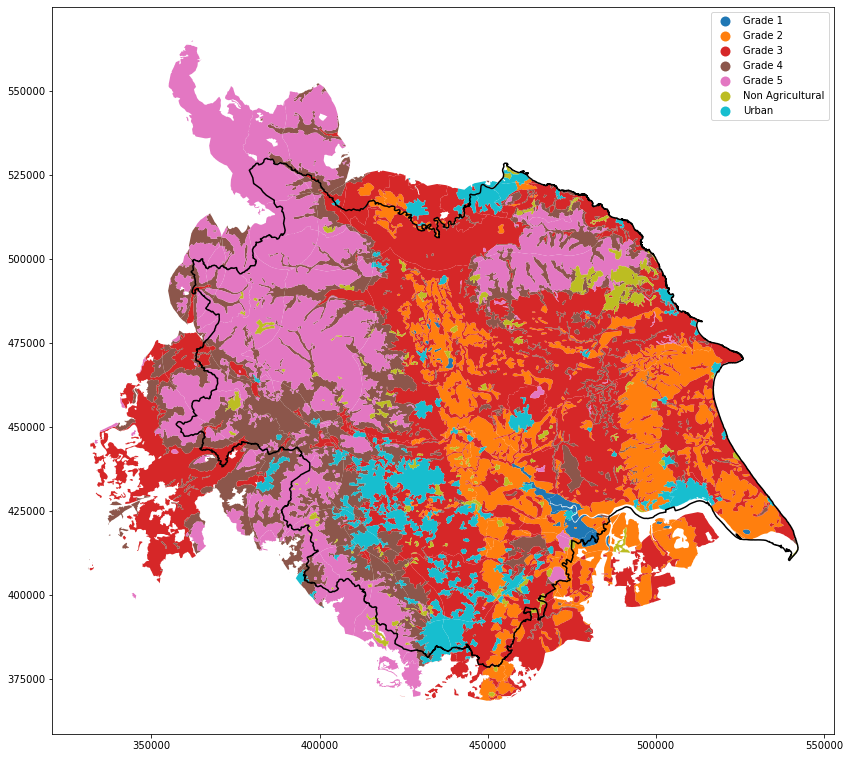

In [7]:
# Plot county boundary and crop polygons on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county
ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc.plot('alc_grade', ax=ax_base, legend=True, markersize = 1)

if cities:
    for key in city_dict.keys():
        lat, lon = city_dict[key]
        plt.text(lon, lat, key, fontweight= 'bold')
        plt.plot(lon, lat, 'ko')



In [8]:
s = gpd.GeoSeries(alc['geometry'].buffer(0), crs='EPSG:27700')
d = {'alc_grade' : alc['alc_grade'] , 'geometry' : s.intersection(counties.iloc[66]['geometry'])}
alc_final = gpd.GeoDataFrame(d, crs="EPSG:27700")

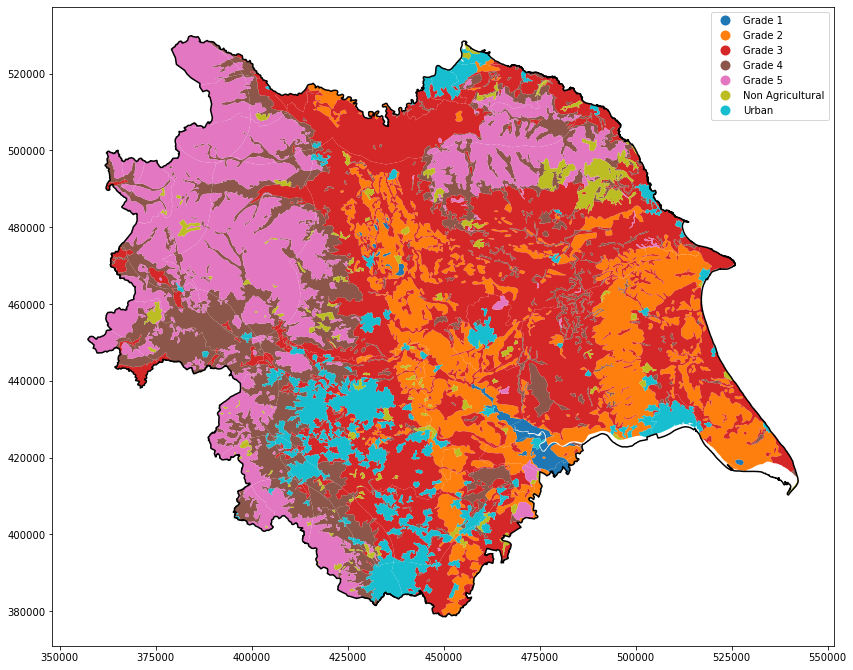

In [9]:
# Plot county boundary and crop positions on the same axes.
# For some reason this is the only way I found to plot the boundary of a single county

ax_base = counties.iloc[yorkshire_index:yorkshire_index+1].boundary.plot(color = 'k', figsize = (14,14))
alc_final.plot('alc_grade', ax=ax_base, markersize = 1, legend=True)

if cities:
    for key in city_dict.keys():
        lat, lon = city_dict[key]
        plt.text(lon, lat, key, fontweight= 'bold')
        plt.plot(lon, lat, 'ko')

In [10]:
xmin, ymin, xmax, ymax = polygon.bounds
print(xmin, ymin, xmax, ymax)
size = np.ceil([(xmax - xmin)/resolution, (ymax - ymin)/resolution]).astype(int)

binsx = np.linspace(xmin, xmax, size[0]+1)
binsy = np.linspace(ymin, ymax, size[1]+1)

ypos = 0.5*(binsy[1:] + binsy[:-1])
xpos = 0.5*(binsx[1:] + binsx[:-1])

print(size)

357386.0036 378555.099 542313.704 529856.1995
[740 606]


In [11]:
alc_final

,alc_grade,geometry
0,Grade 3,"POLYGON ((367144.995 491540.000, 366966.205 49..."
1,Grade 4,"MULTIPOLYGON (((366852.483 492413.885, 366687...."
2,Grade 5,"MULTIPOLYGON (((366687.420 493243.710, 366205...."
3,Grade 5,"MULTIPOLYGON (((386525.045 516937.930, 386522...."
4,Grade 4,"MULTIPOLYGON (((398934.944 516016.457, 399323...."
...,...,...
180,Urban,"MULTIPOLYGON (((458230.000 455260.000, 458420...."
181,Grade 2,"MULTIPOLYGON (((462266.342 522225.004, 461881...."
182,Grade 3,"POLYGON ((465070.285 522358.049, 464636.000 52..."
183,Non Agricultural,"MULTIPOLYGON (((455655.585 528399.549, 455702...."


In [12]:
alc_codes = np.unique(alc_final['alc_grade'])
code_dict = dict(zip(alc_codes, np.arange(len(alc_codes))))
print(code_dict)

{'Grade 1': 0, 'Grade 2': 1, 'Grade 3': 2, 'Grade 4': 3, 'Grade 5': 4, 'Non Agricultural': 5, 'Urban': 6}


In [13]:
# Fill the grid positions and indexes
xxpos = np.tile(xpos, len(ypos))
ix = np.tile(np.arange(size[0]), size[1])
yypos = np.repeat(ypos, len(xpos))
iy = np.repeat(np.arange(size[1]), size[0])

In [14]:
df = pd.DataFrame({'xpos':ix, 'ypos':iy})
df['geometry'] = list(zip(xxpos,yypos))
df['geometry'] = df['geometry'].apply(Point)

points = gpd.GeoDataFrame(df, crs='EPSG:27700')
points

,xpos,ypos,geometry
0,0,0,POINT (357510.955 378679.935)
1,1,0,POINT (357760.857 378679.935)
2,2,0,POINT (358010.759 378679.935)
3,3,0,POINT (358260.662 378679.935)
4,4,0,POINT (358510.564 378679.935)
...,...,...,...
448435,735,605,POINT (541189.144 529731.364)
448436,736,605,POINT (541439.046 529731.364)
448437,737,605,POINT (541688.948 529731.364)
448438,738,605,POINT (541938.851 529731.364)


In [15]:
pointInPolys = gpd.tools.sjoin(points, alc_final, op="within", how='inner')
pointInPolys['grade'] = np.array([code_dict[g] for g in pointInPolys['alc_grade']])
pointInPolys

,xpos,ypos,geometry,index_right,alc_grade,grade
369,369,0,POINT (449724.903 378679.935),112,Grade 3,2
372,372,0,POINT (450474.610 378679.935),112,Grade 3,2
1107,367,1,POINT (449225.098 378929.607),112,Grade 3,2
1108,368,1,POINT (449475.000 378929.607),112,Grade 3,2
1109,369,1,POINT (449724.903 378929.607),112,Grade 3,2
...,...,...,...,...,...,...
440694,394,595,POINT (455972.460 527234.646),183,Non Agricultural,5
440695,395,595,POINT (456222.362 527234.646),183,Non Agricultural,5
441432,392,596,POINT (455472.656 527484.318),183,Non Agricultural,5
441433,393,596,POINT (455722.558 527484.318),183,Non Agricultural,5


In [16]:
grades = np.ones(size)*np.nan
grades[tuple([pointInPolys['xpos'], pointInPolys['ypos']])] = pointInPolys['grade']

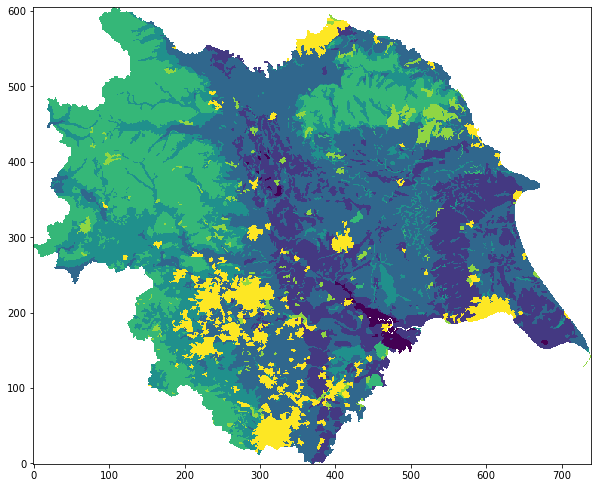

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(grades.T, interpolation='none', origin='lower')

In [18]:
data = xr.Dataset(
    data_vars = dict(
        grade=(["x", "y"], grades)
    ),
    coords = dict(
        x=("x", xpos),
        y=("y", ypos),
    )
)

In [19]:
data

<xarray.Dataset>
Dimensions:  (x: 740, y: 606)
Coordinates:
  * x        (x) float64 3.575e+05 3.578e+05 3.58e+05 ... 5.419e+05 5.422e+05
  * y        (y) float64 3.787e+05 3.789e+05 3.792e+05 ... 5.295e+05 5.297e+05
Data variables:
    grade    (x, y) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

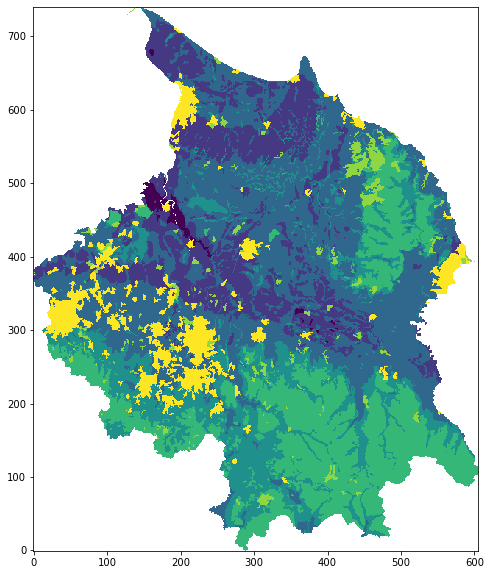

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(data.grade, interpolation='none', origin='lower')

In [21]:
encoding = {"grade":{"dtype":"float32", "zlib": True, "complevel": 5}}
data.to_netcdf(f"../../agrifoodpy/land/data/ALC/ALC_{resolution}.nc", encoding=encoding)